In [150]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')
#Packages related to data importing, manipulation, exploratory data #analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from termcolor import colored as cl # text customization
#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from cProfile import label


<Figure size 600x300 with 0 Axes>

In [151]:
data=pd.read_csv("creditcard.csv")

fraud = data[data['Class']==1]
normal = data[data['Class']==0]

Text(0, 0.5, 'Frequency')

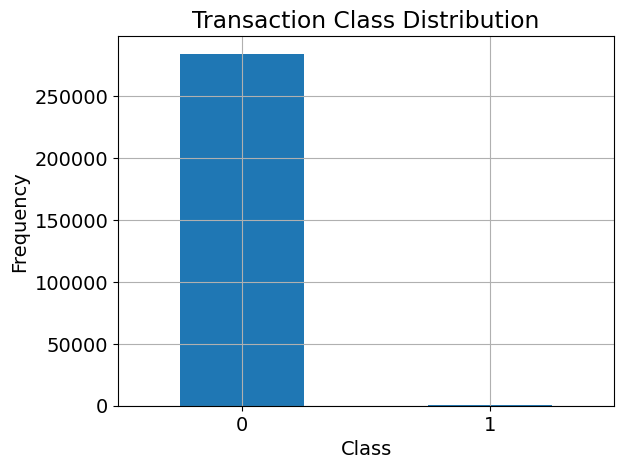

In [152]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")
plt.xlabel("Class")

plt.ylabel("Frequency")

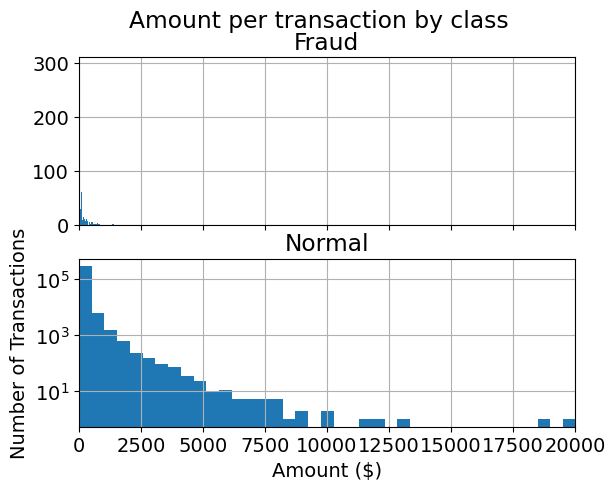

In [153]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

            Time    Amount     Class
Time    1.000000 -0.010596 -0.012323
Amount -0.010596  1.000000  0.005632
Class  -0.012323  0.005632  1.000000


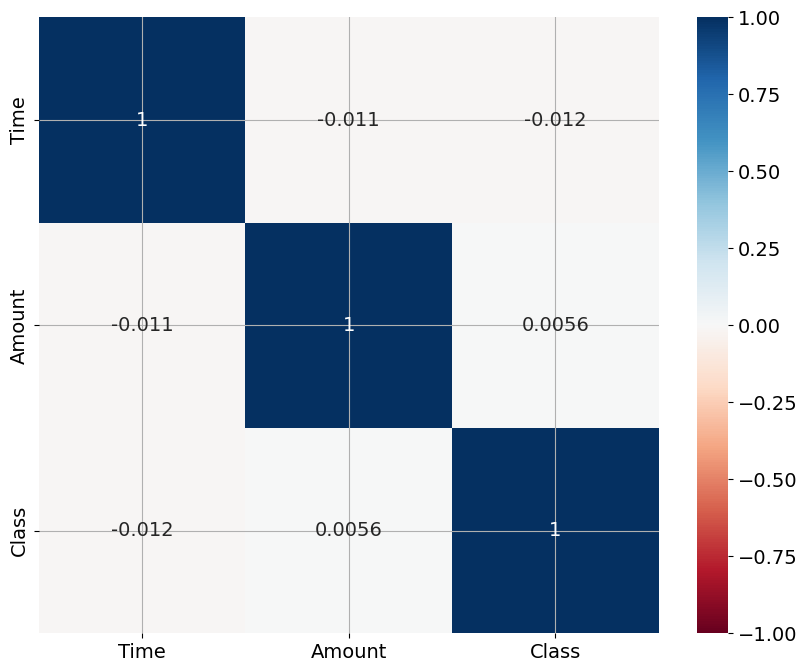

In [154]:
data = data[['Time', 'Amount', 'Class']]
corr = data.corr()
print(corr)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)
plt.show()

In [155]:
Total_transactions=len(data)
normal=len(data[data.Class==0])
fraudulent=len(data[data.Class==1])
fraudulent_percentage=round(fraudulent/normal*100,2)
print(cl('Total transactions are {}'.format(Total_transactions),attrs=['bold'],color='cyan'))

Total transactions are 284807


In [156]:
# data.info()

In [157]:
min(data.Amount),max(data.Amount)

(0.0, 25691.16)

In [158]:
sc=StandardScaler()
amount=data['Amount'].values
data['Amount']=sc.fit_transform(amount.reshape(-1,1))
data.drop(['Time'],axis=1,inplace=True)
data.shape 

(284807, 2)

In [159]:
data.drop_duplicates(inplace=True)
data.shape
X=data.drop('Class',axis=1)
y=data['Class'].values

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [161]:
DT=DecisionTreeClassifier(max_depth=4,criterion='entropy')
DT.fit(X_train,y_train)
tree_yhat=DT.predict(X_test)

In [162]:
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)))

Accuracy score of the Decision Tree model is 0.9927184466019418


In [163]:
print('Accuracy score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)))

Accuracy score of the Decision Tree model is 0.0


In [164]:
confusion_matrix(y_test, tree_yhat, labels = [0, 1])

array([[8180,    2],
       [  58,    0]], dtype=int64)

In [165]:
n = 7
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, y_train)
knn_yhat = KNN.predict(X_test)

In [166]:
print('Accuracy score of the K-Nearest Neighbors model is {}'.format(accuracy_score(y_test, knn_yhat)))

Accuracy score of the K-Nearest Neighbors model is 0.9929611650485437


In [167]:
print('F1 score of the K-Nearest Neighbors model is {}'.format(f1_score(y_test, knn_yhat)))

F1 score of the K-Nearest Neighbors model is 0.0


In [168]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

In [169]:
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)))

Accuracy score of the Logistic Regression model is 0.9929611650485437


In [170]:
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)))

F1 score of the Logistic Regression model is 0.0


In [171]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

In [172]:
print('Accuracy score of the Random Forest model is {}'.format(accuracy_score(y_test, rf_yhat)))

Accuracy score of the Random Forest model is 0.9929611650485437


In [173]:
print('F1 score of the Random Forest model is {}'.format(f1_score(y_test, rf_yhat)))

F1 score of the Random Forest model is 0.0
